In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Activation

In [ ]:
#Task 1: Data Pre-processing
# Read the dataset
df = pd.read_csv('/content/drug200.csv')

# New Section

In [ ]:
# Perform data pre-processing
df.isnull().any()
df.isnull().sum()
print(df.head(6))

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY
5   22   F  NORMAL        HIGH    8.607  drugX


In [ ]:
df.describe(include = 'all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [ ]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

<Axes: >

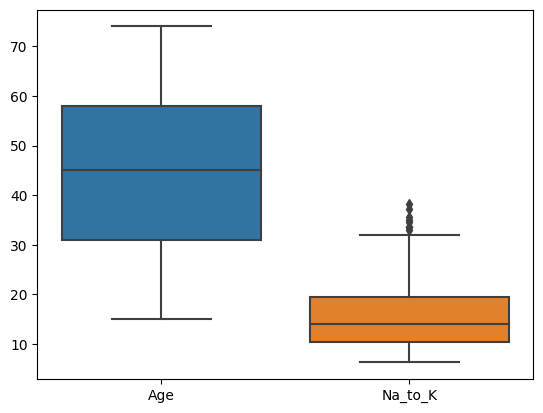

In [ ]:
sns.boxplot(df)

<Axes: >

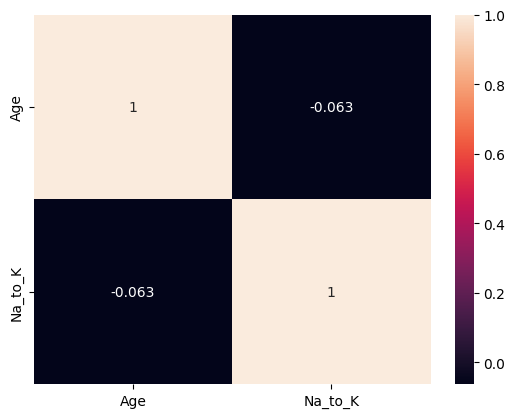

In [ ]:
sns.heatmap(df.corr(),annot = True)

<Axes: >

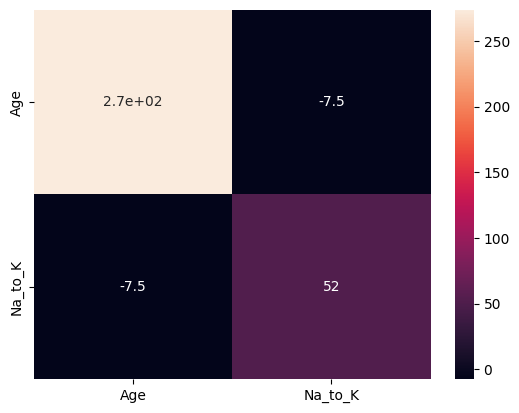

In [ ]:
sns.heatmap(df.cov(),annot=True)

<Axes: xlabel='Na_to_K', ylabel='Density'>

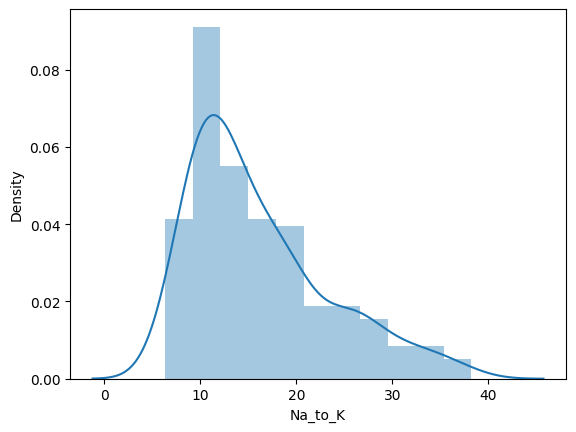

In [ ]:
sns.distplot(df['Na_to_K'])

<Axes: xlabel='Age', ylabel='Na_to_K'>

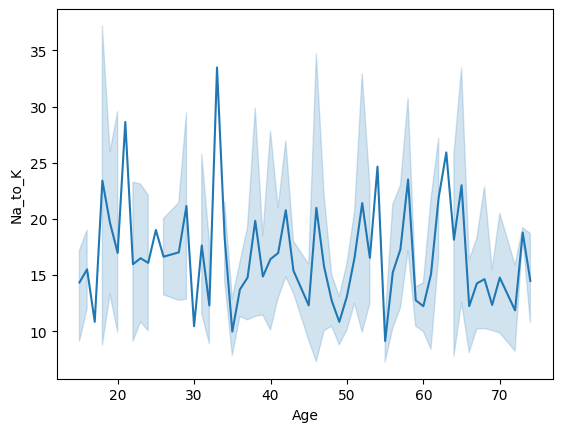

In [ ]:
sns.lineplot(x = df['Age'],y = df['Na_to_K'])

In [ ]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['BP'] = label_encoder.fit_transform(df['BP'])
df['Cholesterol'] = label_encoder.fit_transform(df['Cholesterol'])

In [ ]:
# Normalize numerical variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Na_to_K']] = scaler.fit_transform(df[['Age', 'Na_to_K']])

In [ ]:
# Split the data into features and labels
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
y = pd.get_dummies(df.iloc[:,5:]).values
print(df['Drug'].unique())

['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=67)
print(X)
print(y)

          Age  Sex  BP  Cholesterol   Na_to_K
0   -1.291591    0   0            0  1.286522
1    0.162699    1   1            0 -0.415145
2    0.162699    1   1            0 -0.828558
3   -0.988614    0   2            0 -1.149963
4    1.011034    0   1            0  0.271794
..        ...  ...  ..          ...       ...
195  0.708057    0   1            0 -0.626917
196 -1.715759    1   1            0 -0.565995
197  0.465676    1   2            0 -0.859089
198 -1.291591    1   2            1 -0.286500
199 -0.261469    0   1            1 -0.657170

[200 rows x 5 columns]
[[1 0 0 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 1 0 0]
 [0 0 0 

In [ ]:
X.shape,y.shape


((200, 5), (200, 5))

In [ ]:
#Task 2: Build the ANN Model
# Build the ANN model
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X.shape[1])) # Input layer
model.add(Dense(16, activation='relu')) # Hidden layer 1
model.add(Dense(16, activation='relu')) # Hidden layer 2
model.add(Dense(14, activation='relu')) # Hidden layer 3
model.add(Dense(5, activation='softmax')) # Output layer

In [ ]:
# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                192       
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 14)                238       
                                                                 
 dense_9 (Dense)             (None, 5)                 75        
                                                                 
Total params: 1,305
Trainable params: 1,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=7, validation_data=(X_test, y_test))

Epoch 1/25
22/22 [==============================] - 1s 13ms/step - loss: 1.5177 - accuracy: 0.4000 - val_loss: 1.3988 - val_accuracy: 0.5400
Epoch 2/25
22/22 [==============================] - 0s 5ms/step - loss: 1.3104 - accuracy: 0.5933 - val_loss: 1.2144 - val_accuracy: 0.6200
Epoch 3/25
22/22 [==============================] - 0s 5ms/step - loss: 1.1399 - accuracy: 0.6067 - val_loss: 1.0561 - val_accuracy: 0.6600
Epoch 4/25
22/22 [==============================] - 0s 6ms/step - loss: 0.9995 - accuracy: 0.6267 - val_loss: 0.9132 - val_accuracy: 0.7200
Epoch 5/25
22/22 [==============================] - 0s 5ms/step - loss: 0.8919 - accuracy: 0.6600 - val_loss: 0.7977 - val_accuracy: 0.7600
Epoch 6/25
22/22 [==============================] - 0s 5ms/step - loss: 0.7845 - accuracy: 0.6867 - val_loss: 0.7136 - val_accuracy: 0.7600
Epoch 7/25
22/22 [==============================] - 0s 5ms/step - loss: 0.7166 - accuracy: 0.6867 - val_loss: 0.6525 - val_accuracy: 0.7800
Epoch 8/25
22/22 [=

In [ ]:
ypred = model.predict(X_test)
print(y_test)
ypred = np.argmax(ypred)
output=['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']
print(ypred)

2/2 [==============================] - 0s 7ms/step
[[0 0 0 0 1]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 1]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [1 0 0 0 0]]
50


In [ ]:
""" S V SNEHA SNIGDHA [20MID0179]
    VIT VELLORE"""